In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import random
from pprint import pprint
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
target = iris.target
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data.columns = ['sepal_length','sepal_width','petal_length','petal_width']

In [3]:
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=123)


In [4]:
Example = data.copy()
Example['Label'] = target

In [5]:
X_train['label'] = y_train
train_df = X_train

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
X_test['label'] = y_test
test_df = X_test

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
def check_purity(data):
    
    '''
   Returns a count of the unique classes in a leaf node.
   
    '''
    
    label = data[:,-1]
    #returns array of our unique labels
    unique_classes = np.unique(label)
    
    if len(unique_classes)==1:
        return True
    else:
        return False

In [8]:
check_purity(train_df[train_df['petal_length']>7].values)

False

## Classify

In [9]:
def classify_data(data):
    
    '''
    Counts the number of samples related to each classification 
    and returns that class that has the majority vote
    '''
    
    
    
    label = data[:,-1]
    unique_classes, counts_of_unique_classes = np.unique(label,return_counts=True)

    index = counts_of_unique_classes.argmax()

    classification = unique_classes[index]

    
    
    
    
    return classification




## Potential Splits

In [34]:
def get_potential_splits(data):
    
    '''
    Iterates over each column and returns the unqiue values
    as potential decision split nodes
    
    
    '''
    
    
    potential_splits = {}
    _, n_columns = data.shape
   

    for column_index in range(n_columns-1):
        
        values = data[:, column_index]
        univalues = np.unique(values)
        
        potential_splits[column_index] = univalues
        
    
    return potential_splits

In [37]:
potential_splits = get_potential_splits(train_df.values)
pprint(potential_splits)

{0: array([4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7,
       5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ,
       7.1, 7.2, 7.3, 7.6, 7.7]),
 1: array([2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4,
       3.5, 3.6, 3.7, 3.8, 4. , 4.1, 4.4]),
 2: array([1. , 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3. , 3.3, 3.5, 3.6, 3.7,
       3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ,
       5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.3, 6.6,
       6.7, 6.9]),
 3: array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
       1.7, 1.8, 1.9, 2. , 2.1, 2.3, 2.4, 2.5])}


## Split Data

In [38]:
def split_data(data, split_column, split_value):
    
    '''
    This function will perform the optimal split given the scoring metric (entropy/mse).
    If the feature is a continuous variable, the function will split based on values
    that fall above or below the decision node. 
    
    For categorical, the function will split using equal to and is not equal to logic.
    '''
    
    
    
    split_column_values = data[:, split_column]
    
    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == 'continuous':
    
        data_below = data[split_column_values <=split_value]
        data_above = data[split_column_values >split_value]

    else:
        data_below = data[split_column_values ==split_value]
        data_above = data[split_column_values !=split_value]
        
    
    return data_below, data_above

### Lowest Overall Entropy


In [39]:
def calculate_entropy(data):
    label_column = data[:,-1]
    ##determine probabilities of the classes

    #count up the number of samples in each label
    _,counts = np.unique(label_column,return_counts=True)
    
    #convert the count to the probability of a value falling into a certain class label
    probabilities = counts/counts.sum()

    
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

In [40]:
def calculate_overall_entropy(data_below,data_above):
    
    
    '''
    Combines the entropy metric of values that fall above and below the decision split
    and returns the score
    
    '''
    
    n_data_points = len(data_below) + len(data_above)


    #samples below the line
    p_data_below = len(data_below)/n_data_points

    #samples above the line
    p_data_above = len(data_above)/n_data_points

    overall_entropy = (p_data_below * calculate_entropy(data_below)

                      +p_data_above * calculate_entropy(data_above))

    
    
    
    return overall_entropy
    

## Determine the splits that results in the lowest overall entropy

In [41]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 999

    """
    We start off by setting the initial overall entropy arbitrarily high.
    
    The function then Iterates over each split list and calculates the overall entropy of the current
    decision split. If new split value results in a lower entropy score, the funciton will replace the
    old entropy metric. 
    """

    for column_index in potential_splits:
        
        
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data,split_column=column_index,split_value=value)

            current_overall_entropy = calculate_overall_entropy(data_below,data_above)

            if current_overall_entropy <= overall_entropy:

                overall_entropy=current_overall_entropy


                best_split_column = column_index

                best_split_value = value
                
                
    return best_split_column,best_split_value

In [42]:
def determine_type_of_feature(data):
    '''
    this function will determine if the feature is continuous vs. categorical
    '''
    
    
    feature_types = []
    n_unique_values_threshold = 15
    for column in data.columns:
        unique_vals = data[column].unique()
        example_value = unique_vals[0]
        
        if type(example_value) == str or (len(unique_vals)<= n_unique_values_threshold):
            feature_types.append("categorical")
        else:
            feature_types.append("continuous")
    return feature_types

## Decision Tree Algorithm

sub_tree = {question: [yes_answer, no_answer]}

## ALGORITHM

In [43]:
def DecisionTreeAlgo(df, counter=0, min_samples=2, max_depth=5):
    
    """
    minimum sample size: the minimum number of sampels a node must contain in
    order to consider splitting.
    """
    
    
    # data preparations
    
    if counter == 0:
        
        global COLUMN_HEADERS, FEATURE_TYPES
        
        
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        
        data = df.values
    else:
        
        data = df
        
        
    # base case for recusive function
    if (check_purity(data)) or (len(data)< min_samples) or (counter==max_depth):
        #return our prediction
        classification = classify_data(data)
        return classification
    
    
    #recursive section
    
    else:
        
        counter += 1
        
        
        # run helper functions
        
        potential_splits = get_potential_splits(data)
  
            
        #find lowest overall entropy
        
        split_column, split_value = determine_best_split(data, potential_splits)
        
        
        data_below, data_above = split_data(data, split_column, split_value)
        
        
        #check for empty data
        if len(data_below) == 0 or len(data_above)==0:
            classification = classify_data(data)
            return classification
        
        
        #instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == 'continuous':
            question  = "{} <= {}".format(feature_name,split_value)
            
        else:
            
            question  = "{} == {}".format(feature_name,split_value)

        
        sub_tree = {question: []}
        
        
        #find answers
        
        yes_answer = DecisionTreeAlgo(data_below, counter, min_samples,max_depth)
        
        
        no_answer = DecisionTreeAlgo(data_above, counter, min_samples,max_depth)
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            
        
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        
        return sub_tree
        
    

In [44]:
tree = DecisionTreeAlgo(train_df,min_samples=5,max_depth=3)

## Classify

In [45]:
def predict(example, tree):
    question = list(tree.keys())[0]

    feature_name, comparison, value = question.split()

    # ask question
    
    if comparison == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0] 
        else:
            answer = tree[question][1] 
            
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0] 
        else:
            answer = tree[question][1]
        
        

    #base case    
    if not isinstance(answer, dict):
        return(answer)
    else:

        residual_tree = answer
        return predict(example,residual_tree) 

## Accuracy

In [46]:
def calculate_accuracy(df,tree):
    
    df['classification'] = df.apply(predict, axis=1, args=(tree,))
    
    df['classification_correct'] = df.classification == df.label
    
    
    accuracy = df.classification_correct.mean()
    return accuracy
    

In [47]:
calculate_accuracy(test_df,tree)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.94

Text(0.5, 1, 'Petal Leaves')

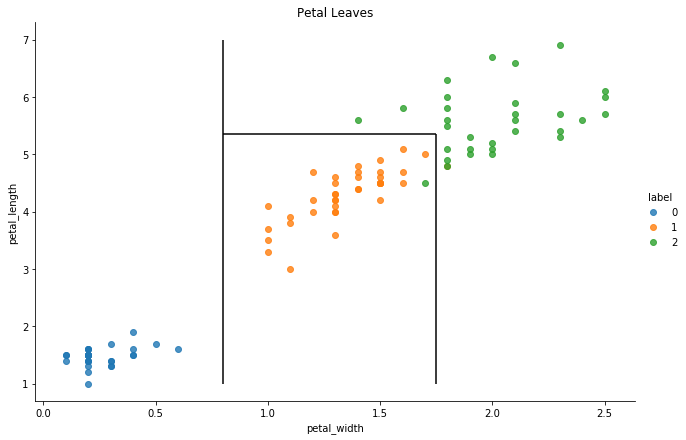

In [49]:

import seaborn as sns
import matplotlib.pyplot as plt
split_column2 = 3
split_value2 = 1.75
split_value = 0.8
split_value3 = 5.35
#data_below, data_above = split_data(Example.values,split_column,split_value)
data_belowsplit2, data_abovesplit2 = split_data(train_df.values,split_column2,split_value2)



plotting_df = pd.DataFrame(data_belowsplit2,columns=train_df.columns)

sns.lmplot(data=train_df,x='petal_width',y='petal_length',fit_reg=False,size=6,aspect=1.5,
          hue='label')
plt.vlines(x=split_value2,ymin=1,ymax=split_value3)

plt.vlines(x=split_value,ymin=1,ymax=7)
plt.hlines(y=split_value3,xmin=split_value,xmax=split_value2)

plt.title('Petal Leaves')

## Decision With Categories Tree Algo

In [ ]:
from pprint import pprint
tree = DecisionTreeAlgo(train_df,min_samples=3,max_depth=10)
pprint(tree, width=50,depth=10)


calculate_accuracy(test_df,tree)

In [ ]:
train_df.iloc[:,:-1]